# Listen to MIDI

In [2]:
import pretty_midi
from IPython import display

_SAMPLING_RATE = 16000

In [3]:
def play_audio(file_path, seconds=30):
  pm = pretty_midi.PrettyMIDI(file_path)
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

# midi_file = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation_2/midi_data/drums/TRAAAZF12903CCCF6B.mid"

# play_audio(midi_file)

# Run Data.py

In [1]:
import os
from Data import Data

In [2]:
DATASET_DIR: str = os.path.abspath(os.path.join("data", "LAKH-MIDI-Dataset-Matched"))
H5_MATCHED_DIR: str = os.path.abspath(os.path.join("data", "LAKH-H5-Matched"))
MIDI_DIR: str = os.path.abspath("midi_data")
MATCH_SCORES_FILEPATH: str = os.path.abspath(os.path.join("data", "match_scores.json"))
GENRE_LIST = ["pop"]
SAMPLE_SIZE: int = 20

POOL_SIZE = 1
PRINT_PLOT = True

START
Exception during processing of TRBOSST128F9331BF6: Error in request for 'Kneedeep feat. Sharlene Hector' - 'Take Me By The Hand Part 1': 'Track not found'
Exception during processing of TRJPWMO128F1464431: Error in request for 'Gerry & The Pacemakers' - 'You'll Never Walk Alone': 'Track not found'
END
Number of tracks: 31034, number of tracks in sample: 20, number of results: 20 (100.00%)
Time: 8.7488637289498


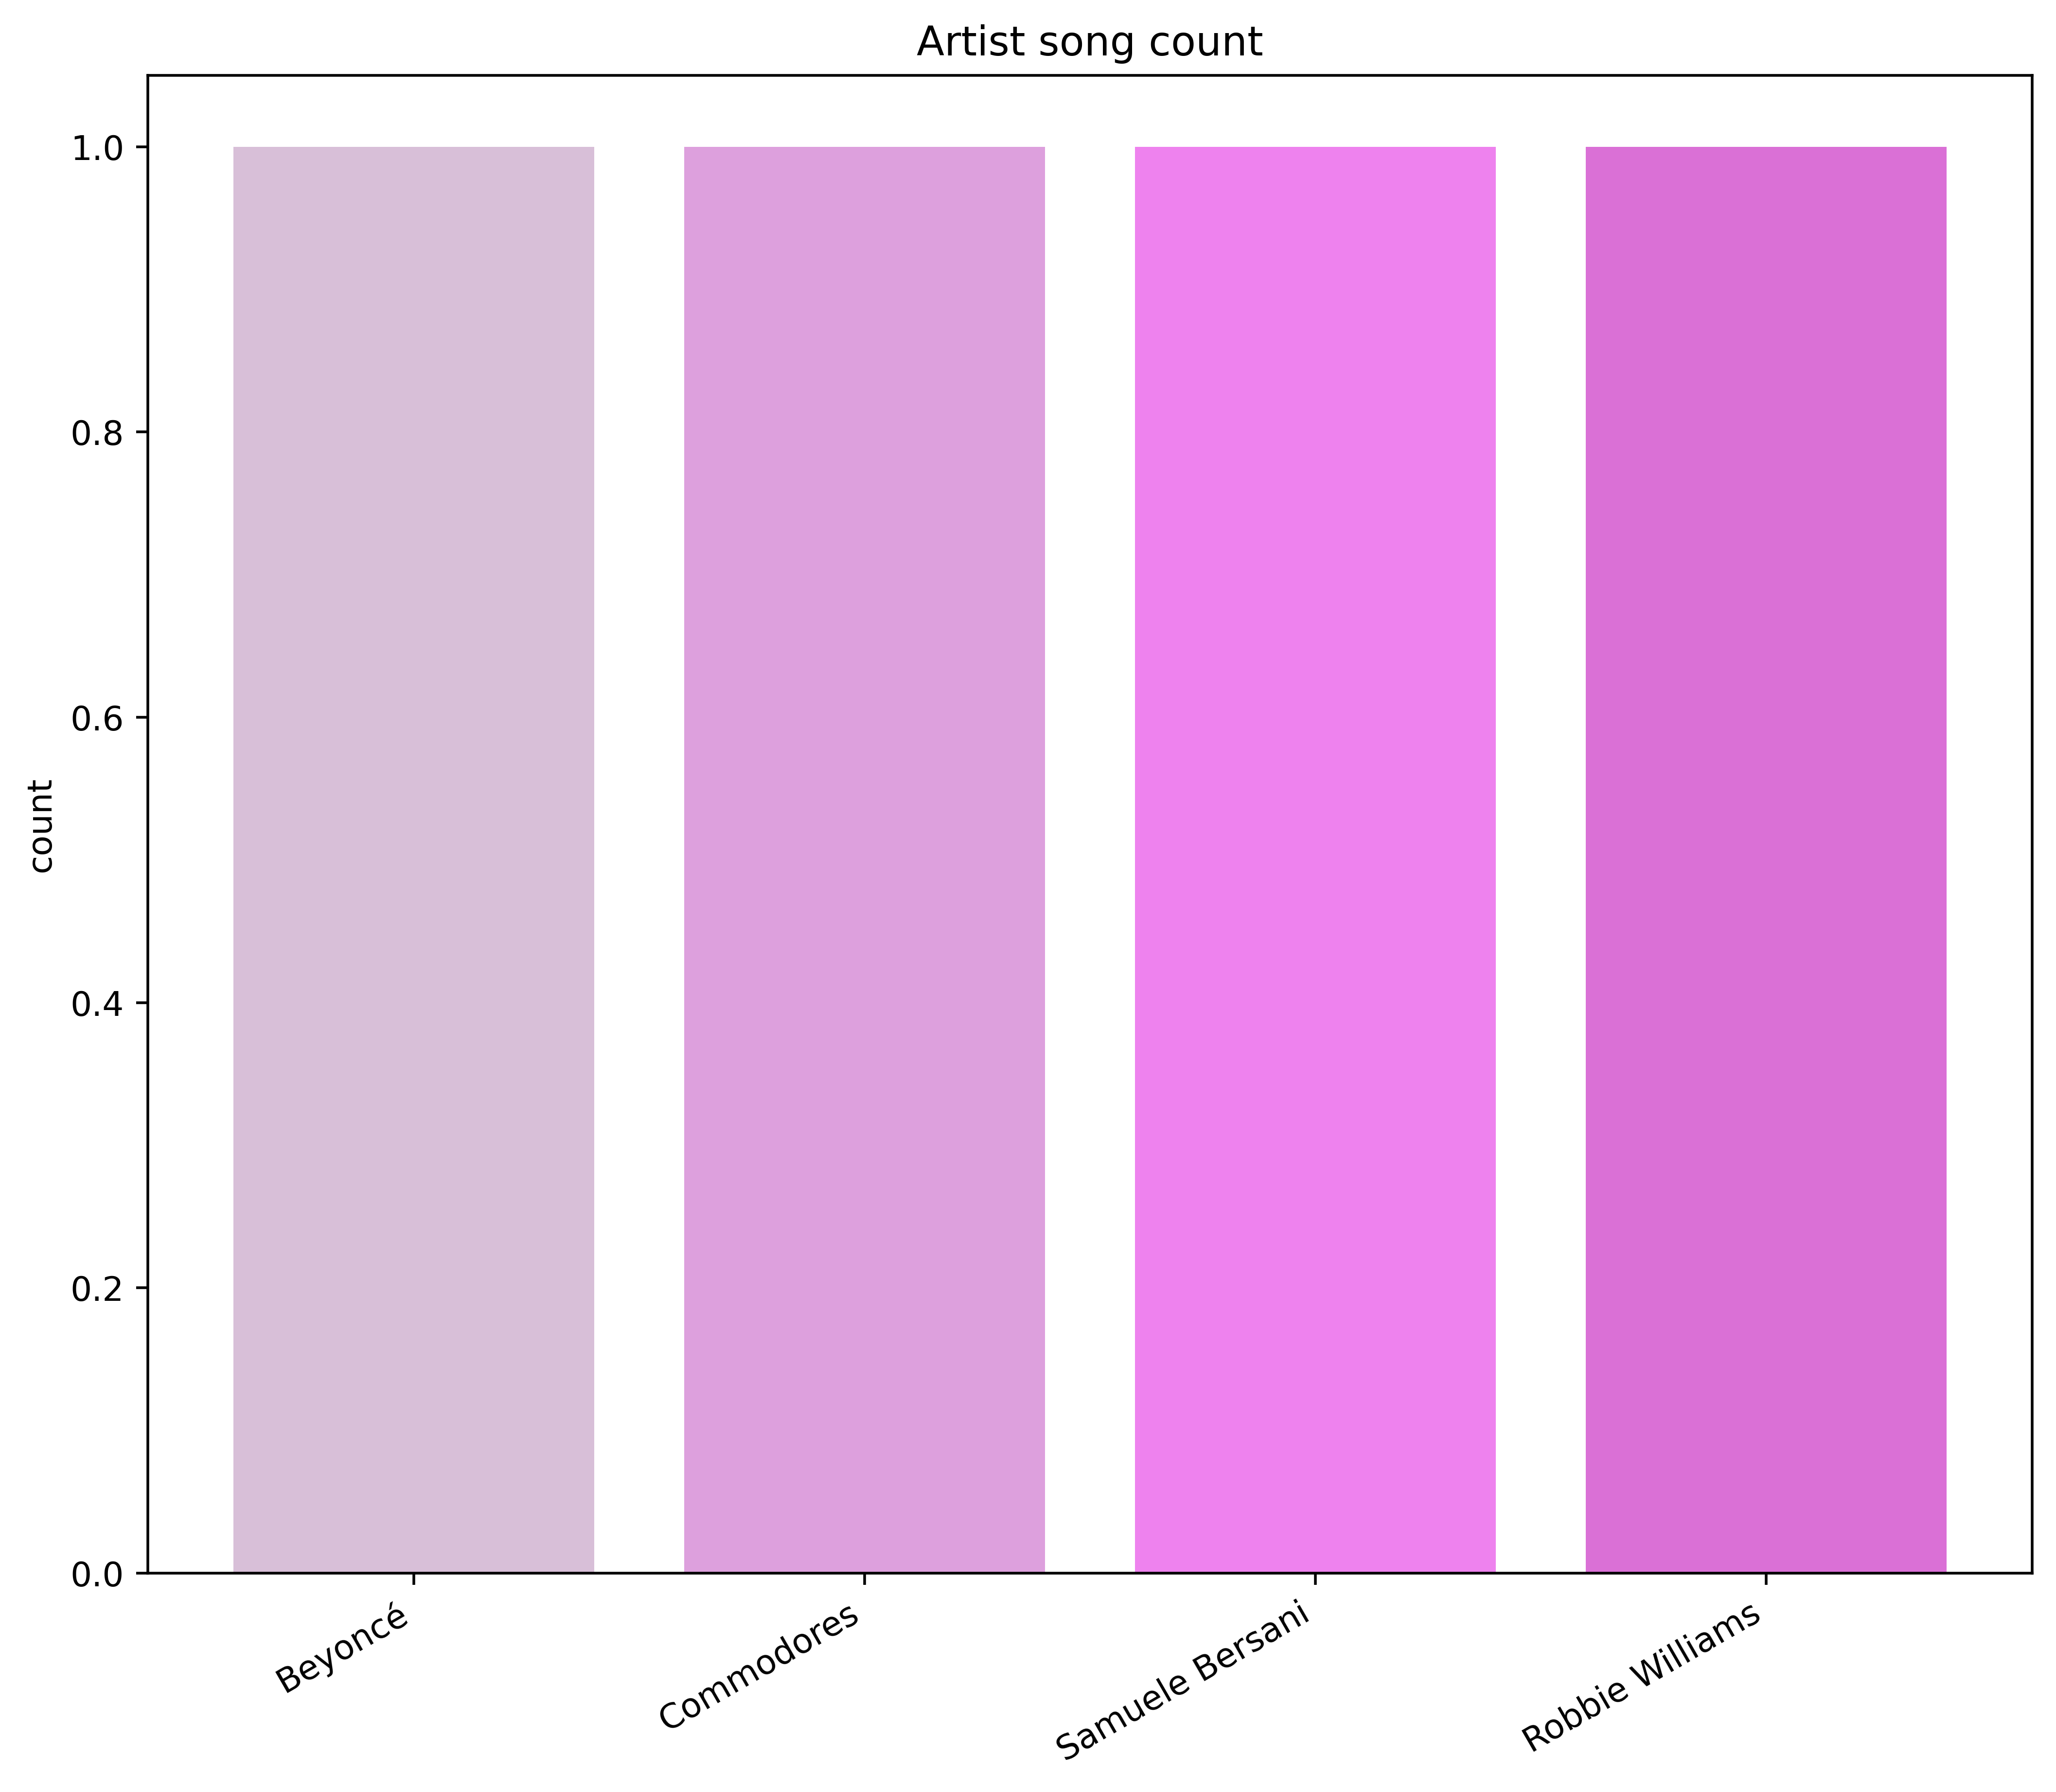

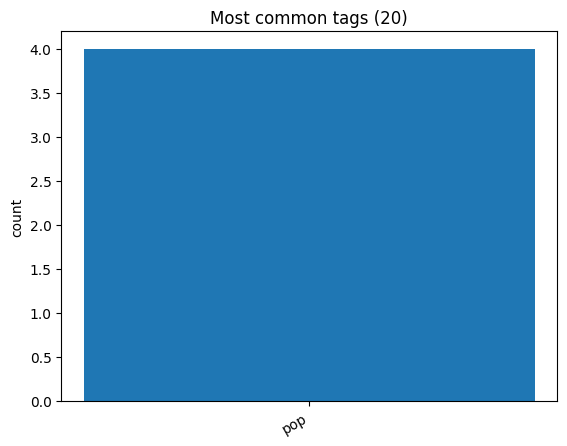

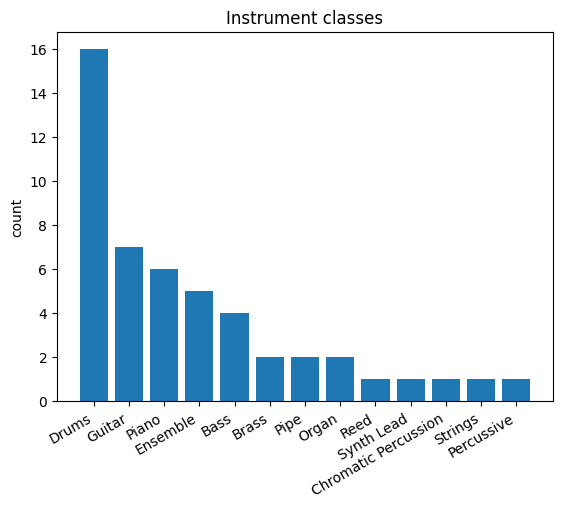

In [3]:
# data = Data(DATASET_DIR, H5_MATCHED_DIR, MIDI_DIR, MATCH_SCORES_FILEPATH, GENRE_LIST, SAMPLE_SIZE)
# data.extract(POOL_SIZE, PRINT_PLOT)

# Classify one MIDI

In [4]:
import numpy as np
from MEC import MEC_predict, get_MIDI_features
import pretty_midi
from IPython import display

_SAMPLING_RATE = 16000

def play_audio(file_path, seconds=30):
  pm = pretty_midi.PrettyMIDI(file_path)
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [29]:
model_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation_2/MEC_model.h5"
midi_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation_2/midi_data/pianos/TRFTQWV128F92C3270_7.mid"

emotion_class = ['Happiness', 'Angry', 'Sadness', 'Calmness']

# Get emotion
ys_pred = MEC_predict(model_path, midi_path, 0)
ys_class = np.argmax(ys_pred)
emotion = emotion_class[ys_class]

# Get features
features = get_MIDI_features(midi_path, 0)

print(f"Emotion : {emotion}")
print(f"    Happiness : {ys_pred[0][0]:.4f}")
print(f"    Angry     : {ys_pred[0][1]:.4f}")
print(f"    Sadness   : {ys_pred[0][2]:.4f}")
print(f"    Calmness  : {ys_pred[0][3]:.4f}")

print('')

print(f"Average:")
print(f"    Note Density  : {features['note_density_avg']}")
print(f"    Note Length   : {features['note_length_avg']}")
print(f"    Note Velocity : {features['note_velocity_avg']}")
print(f"    Pitch         : {features['pitch_avg']}")
print("")
print(f"Standard Deviation:")
print(f"    Note Density  : {features['note_density_sd']}")
print(f"    Note Length   : {features['note_length_sd']}")
print(f"    Note Velocity : {features['note_velocity_sd']}")
print(f"    Pitch         : {features['pitch_sd']}")
print("")
print(f"Scale              : {features['scale']}")
print(f"Major Minor        : {features['major_minor']}")
print(f"80% Pitch Range    : {features['80%_pitch_range']}")
print(f"Polyphony          : {features['polyphony']}")
print(f"Pitch Entropy      : {features['pitch_entropy']}")
print(f"Groove Consistency : {features['groove_consistency']}")
print("")


play_audio(midi_path, seconds=120)

# Happiness Angry Sadness Calmness

"""
Note Density: How many notes in one beat
Note Length: How long is one note (in beat unit)
Note Velocity: Volume [0, 127]
Pitch: [0, 127]

https://computermusicresource.com/midikeys.html
Scale: [0, 12) -> C, C#, D, D#, E, F, F#, G, G#, A, A#, B
Major: Minor = 0, Major = 1
80% Pitch Range: Middle 80% pitch range
Polyphony: Average Number of pitch per second (1.0 = Mono)
Pitch Entropy: IGNORE
Groove Consistency: Groove consistence or not (hamming distance)
"""


Emotion : Sadness
    Happiness : 0.2727
    Angry     : 0.0007
    Sadness   : 0.4572
    Calmness  : 0.2694

Average:
    Note Density  : 1.0676470588235294
    Note Length   : 0.05434750000000001
    Note Velocity : 55.53846153846154
    Pitch         : 67.20879120879121

Standard Deviation:
    Note Density  : 0.7142336856978023
    Note Length   : 6.938893903907228e-18
    Note Velocity : 21.41661965934718
    Pitch         : 13.759725019227595

Scale              : 1.0
Major Minor        : 1.0
80% Pitch Range    : 35.0
Polyphony          : 1.0
Pitch Entropy      : 4.690128893300106
Groove Consistency : 0.9947533700980392



fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


# Split Emotion

In [1]:
import os
import numpy as np
from MEC import MEC_predict, get_MIDI_features, get_info, move_midi_by_emotion
import pretty_midi
from IPython import display

_SAMPLING_RATE = 16000

def play_audio(file_path, seconds=30):
  pm = pretty_midi.PrettyMIDI(file_path)
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [2]:
model_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider-Models/Music_Generation_2/MEC_model.h5"
midi_folder = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider-Models/Music_Generation_2/midi_data/pianos"
unclassified_folder = os.path.join(midi_folder, "unclassified")

emotion_class = ['Happiness', 'Angry', 'Sadness', 'Calmness']

# Get emotion
move_midi_by_emotion(model_path, midi_folder, 1, emotion_class, sample_size=10)


# for midi in midi_info:
#     print(f"Emotion = {midi['emotion']}   |   Scale = {midi['scale']}   |   MajMin = {midi['major_minor']}")

2023-03-04 20:27:40.159930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Emotion = Angry   |   Scale = 0.0   |   MajMin = 0.0
Emotion = Calmness   |   Scale = 1.0   |   MajMin = 1.0
Emotion = Happiness   |   Scale = 4.0   |   MajMin = 1.0
Emotion = Happiness   |   Scale = 7.0   |   MajMin = 1.0
Emotion = Happiness   |   Scale = 9.0   |   MajMin = 1.0
Emotion = Happiness   |   Scale = 0.0   |   MajMin = 1.0
Emotion = Angry   |   Scale = 10.0   |   MajMin = 1.0
Emotion = Angry   |   Scale = 2.0   |   MajMin = 1.0
Emotion = Angry   |   Scale = 7.0   |   MajMin = 1.0
Emotion = Angry   |   Scale = 3.0   |   MajMin = 1.0
